# Cleaning house listings for sale

In [220]:
import pandas as pd
import numpy as np
import re
import warnings

#!pip install pydotplus

from IPython.display import Image, display #for tree plot 
import pydotplus 
from scipy import misc

import plotly.express as px

import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)


## Import the data

In [221]:
df=pd.read_csv('RealEstateNewYork.csv',sep=',',low_memory=False)

In [222]:
df.shape

(8652, 15)

In [223]:
df_clean=df.copy()

## Acquaintance with the data

In [224]:
df_clean.describe(include='all')

,price,beds,baths,garage,stories,house_type,lot_sqft,sqft,year_built,address,state,city,lat,lon,county
count,8.652000e+03,8446.000000,8555.000000,4448.000000,5727.000000,8652,6.823000e+03,6685.000000,8304.000000,8632,8652,8649,8305.000000,8305.000000,8637
unique,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,8574,1,1126,NaN,NaN,63
top,NaN,NaN,NaN,NaN,NaN,single_family,NaN,NaN,NaN,378 Ohayo Mountain Rd,NY,New York City,NaN,NaN,Suffolk
freq,NaN,NaN,NaN,NaN,NaN,5360,NaN,NaN,NaN,4,8652,618,NaN,NaN,945
mean,8.860852e+05,3.278830,2.326943,1.809128,3.451545,NaN,2.272177e+05,2213.703665,1954.759634,NaN,NaN,NaN,41.627811,-74.663843,NaN
std,1.962067e+06,1.699035,1.391906,2.429346,6.443206,NaN,6.082248e+06,8857.273151,39.266962,NaN,NaN,NaN,1.060644,1.705469,NaN
min,4.990000e+02,0.000000,0.000000,1.000000,1.000000,NaN,6.500000e+01,0.000000,1720.000000,NaN,NaN,NaN,34.603396,-79.756718,NaN
25%,2.500000e+05,2.000000,1.000000,1.000000,2.000000,NaN,5.000000e+03,1226.000000,1929.750000,NaN,NaN,NaN,40.749807,-74.993601,NaN
50%,5.000000e+05,3.000000,2.000000,2.000000,2.000000,NaN,1.045400e+04,1724.000000,1958.000000,NaN,NaN,NaN,41.011198,-73.952879,NaN
75%,8.500000e+05,4.000000,3.000000,2.000000,3.000000,NaN,3.142850e+04,2392.000000,1983.000000,NaN,NaN,NaN,42.721893,-73.738491,NaN


In [225]:
df_clean.isnull().sum().sum()

12308

In [226]:
df_clean.isnull().sum()

price            0
beds           206
baths           97
garage        4204
stories       2925
house_type       0
lot_sqft      1829
sqft          1967
year_built     348
address         20
state            0
city             3
lat            347
lon            347
county          15
dtype: int64

## Deal with missing data

### 1. Delete missing values:

In [227]:
df_clean = df_clean.dropna(subset=['city','county']).reset_index(drop=True)
df_clean

,price,beds,baths,garage,stories,house_type,lot_sqft,sqft,year_built,address,state,city,lat,lon,county
0,139900,3.0,2.0,NaN,NaN,single_family,12632.0,1190.0,1920.0,154 Maple Ave,NY,Delanson,42.734360,-74.185005,Schenectady
1,395000,4.0,3.0,2.0,2.0,single_family,30056.0,2987.0,1982.0,1169 Hidden Valley Trl,NY,Webster,43.243062,-77.440707,Monroe
2,185000,4.0,2.0,1.0,1.0,single_family,7501.0,1863.0,1965.0,7869 Oneida Trl,NY,Bridgeport,43.163020,-75.982109,Onondaga
3,440000,4.0,3.0,2.0,2.0,single_family,17860.0,1940.0,1965.0,16 Brookland Farms Rd,NY,Poughkeepsie,41.635654,-73.910101,Dutchess
4,975700,5.0,6.0,3.0,2.0,single_family,25544.0,5660.0,1999.0,7534 Plum Hollow Cir,NY,Liverpool,43.146254,-76.169151,Onondaga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8630,1049000,6.0,2.0,1.0,NaN,multi_family,2896.0,NaN,1920.0,74-15 88th Ave,NY,Woodhaven,40.689428,-73.867066,Queens
8631,1495000,1.0,1.0,NaN,16.0,coop,NaN,NaN,1925.0,45 5th Ave Apt 17C,NY,New York City,40.734161,-73.994557,New York
8632,1395000,3.0,1.0,NaN,5.0,condos,NaN,NaN,1890.0,705 Carroll St Apt 4R,NY,New York City,40.673940,-73.977606,Kings
8633,4500000,6.0,4.0,NaN,4.0,townhomes,NaN,NaN,NaN,608 3rd St,NY,New York City,40.668649,-73.975270,Kings


In [228]:
df_clean.isnull().sum()

price            0
beds           205
baths           96
garage        4188
stories       2921
house_type       0
lot_sqft      1817
sqft          1960
year_built     347
address         20
state            0
city             0
lat            333
lon            333
county           0
dtype: int64

### 2. Fill NaNs :

In [229]:
df_clean.year_built = df_clean.year_built.fillna(df_clean.year_built.median())
df_clean.beds = df_clean.beds.fillna(df_clean.beds.median())
df_clean.baths = df_clean.baths.fillna(df_clean.baths.median())
df_clean.garage = df_clean.garage.fillna(df_clean.garage.median())
df_clean.stories = df_clean.stories.fillna(df_clean.stories.median())
df_clean.sqft = df_clean.sqft.fillna(df_clean.sqft.median())
df_clean.lot_sqft = df_clean.lot_sqft.fillna(df_clean.lot_sqft.median())
df_clean.address = df_clean.address.fillna('Not Specified')

## Drop the unnecessary columns

In [230]:
df_clean = df_clean.drop(columns=(['lon', 'lat']))

## Remove duplicates

In [231]:
df_clean= df_clean.drop_duplicates().reset_index(drop=True)
df_clean

,price,beds,baths,garage,stories,house_type,lot_sqft,sqft,year_built,address,state,city,county
0,139900,3.0,2.0,2.0,2.0,single_family,12632.0,1190.0,1920.0,154 Maple Ave,NY,Delanson,Schenectady
1,395000,4.0,3.0,2.0,2.0,single_family,30056.0,2987.0,1982.0,1169 Hidden Valley Trl,NY,Webster,Monroe
2,185000,4.0,2.0,1.0,1.0,single_family,7501.0,1863.0,1965.0,7869 Oneida Trl,NY,Bridgeport,Onondaga
3,440000,4.0,3.0,2.0,2.0,single_family,17860.0,1940.0,1965.0,16 Brookland Farms Rd,NY,Poughkeepsie,Dutchess
4,975700,5.0,6.0,3.0,2.0,single_family,25544.0,5660.0,1999.0,7534 Plum Hollow Cir,NY,Liverpool,Onondaga
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,1049000,6.0,2.0,1.0,2.0,multi_family,2896.0,1725.0,1920.0,74-15 88th Ave,NY,Woodhaven,Queens
8623,1495000,1.0,1.0,2.0,16.0,coop,10454.0,1725.0,1925.0,45 5th Ave Apt 17C,NY,New York City,New York
8624,1395000,3.0,1.0,2.0,5.0,condos,10454.0,1725.0,1890.0,705 Carroll St Apt 4R,NY,New York City,Kings
8625,4500000,6.0,4.0,2.0,4.0,townhomes,10454.0,1725.0,1958.0,608 3rd St,NY,New York City,Kings


## Changing data types

In [249]:
df_clean['year_built']=df_clean['year_built'].astype(np.int64)

df_clean['beds']=df_clean['beds'].astype(np.float64)

df_clean['baths']=df_clean['baths'].astype(np.float64)

df_clean['stories']=df_clean['stories'].astype(np.int64)

df_clean['lot_sqft']=df_clean['lot_sqft'].astype(np.int64)

df_clean['sqft']=df_clean['sqft'].astype(np.int64)

df_clean['garage']=df_clean['garage'].astype(np.int64)

df_clean['price']=df_clean['price'].astype(np.float64)


In [250]:
df_clean.dtypes

price         float64
beds          float64
baths         float64
garage          int64
stories         int64
house_type     object
lot_sqft        int64
sqft            int64
year_built      int64
address        object
state          object
city           object
county         object
dtype: object

## Using pandas describe() to find outliers


In [251]:
df_clean.describe(include='all')

,price,beds,baths,garage,stories,house_type,lot_sqft,sqft,year_built,address,state,city,county
count,8.627000e+03,8627.000000,8627.000000,8627.000000,8627.000000,8627,8.627000e+03,8627.000000,8627.000000,8627,8627,8627,8627
unique,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,8558,1,1122,62
top,NaN,NaN,NaN,NaN,NaN,single_family,NaN,NaN,NaN,Not Specified,NY,New York City,Suffolk
freq,NaN,NaN,NaN,NaN,NaN,5350,NaN,NaN,NaN,20,8627,609,944
mean,8.866795e+05,3.273328,2.323751,1.901704,2.955141,NaN,1.815589e+05,2097.299177,1954.845369,NaN,NaN,NaN,NaN
std,1.964671e+06,1.678394,1.382996,1.746868,5.283079,NaN,5.409682e+06,7780.625620,38.499541,NaN,NaN,NaN,NaN
min,4.990000e+02,0.000000,0.000000,1.000000,1.000000,NaN,6.500000e+01,0.000000,1720.000000,NaN,NaN,NaN,NaN
25%,2.499990e+05,2.000000,1.000000,2.000000,2.000000,NaN,6.000000e+03,1360.000000,1930.000000,NaN,NaN,NaN,NaN
50%,5.000000e+05,3.000000,2.000000,2.000000,2.000000,NaN,1.045400e+04,1725.000000,1958.000000,NaN,NaN,NaN,NaN
75%,8.500000e+05,4.000000,3.000000,2.000000,2.000000,NaN,2.178000e+04,2159.500000,1981.000000,NaN,NaN,NaN,NaN


## Detecting outliers graphically

### 1. Price outliers : 

In [296]:
df_clean['price'].describe()

count    8.627000e+03
mean     8.866795e+05
std      1.964671e+06
min      4.990000e+02
25%      2.499990e+05
50%      5.000000e+05
75%      8.500000e+05
max      5.800000e+07
Name: price, dtype: float64

In [297]:
z_score = (df_clean['price'] - df_clean['price'].mean()) / df_clean['price'].std()

In [298]:
outliers = abs(z_score) > 3
sum(outliers)

98

In [299]:
Q1 = np.nanpercentile(df['price'],25)
Q3 = np.nanpercentile(df['price'],75)
IQR = Q3 - Q1

In [300]:
Q1

250000.0

In [301]:
Q3

850000.0

<AxesSubplot:xlabel='price'>

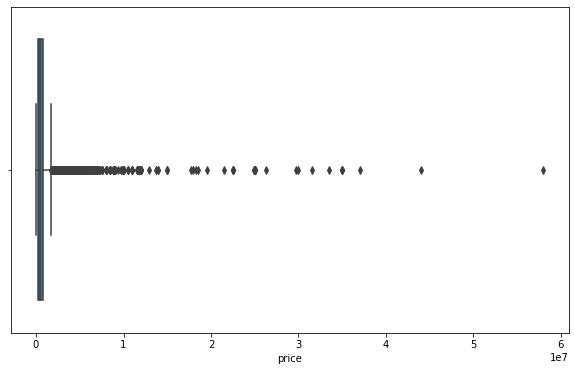

In [302]:
warnings.filterwarnings('ignore')
sns.boxplot(df_clean.price)

In [303]:
price_outlier_rows = df_clean[(df_clean['price'] < Q1 - 1.5*IQR) | (df_clean['price'] > Q3 + 1.5*IQR)].index

In [304]:
len(price_outlier_rows)

733

### 2. Bed outliers : 

<AxesSubplot:xlabel='beds'>

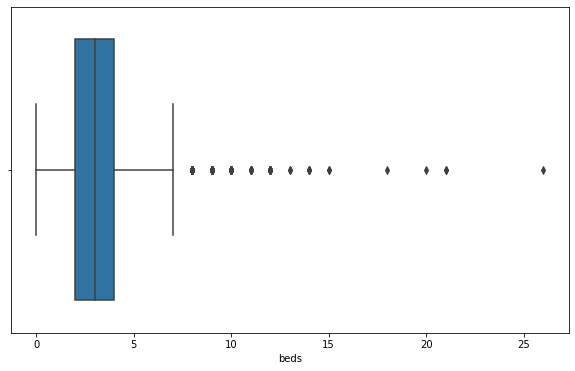

In [305]:
sns.boxplot(df_clean.beds)


In [330]:
Q1 = np.nanpercentile(df['beds'],25)
Q3 = np.nanpercentile(df['beds'],75)
IQR = Q3 - Q1

beds_outlier_rows = df_clean[(df_clean['beds'] < Q1 - 1.5*IQR) | (df_clean['beds'] > Q3 + 1.5*IQR)].index
len(beds_outlier_rows)

167

In [331]:
(df['beds'] > 7).sum()

168

### 2.1 Handling bed outliers :

### 3. Bath outliers : 

<AxesSubplot:xlabel='baths'>

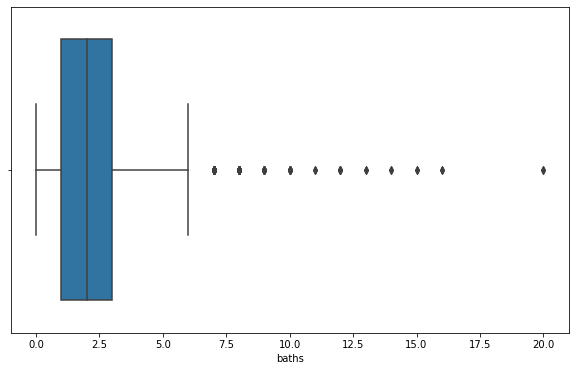

In [307]:
sns.boxplot(df_clean.baths)

In [308]:
Q1 = np.nanpercentile(df['baths'],25)
Q3 = np.nanpercentile(df['baths'],75)
IQR = Q3 - Q1

baths_outlier_rows = df_clean[(df_clean['baths'] < Q1 - 1.5*IQR) | (df_clean['baths'] > Q3 + 1.5*IQR)].index
len(baths_outlier_rows)

120

### 3.1 Handling bath outliers :

### 4. Garage outliers : 

<AxesSubplot:xlabel='garage'>

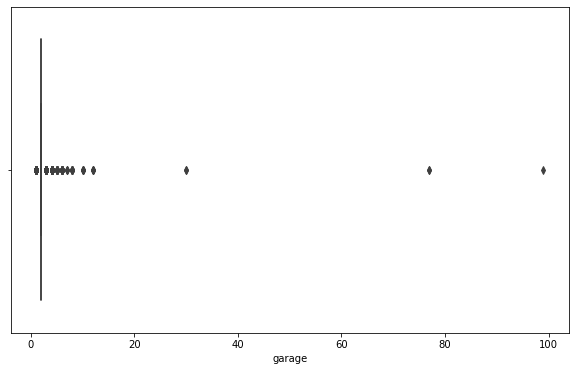

In [309]:
sns.boxplot(df_clean.garage)

In [310]:
Q1 = np.nanpercentile(df['garage'],25)
Q3 = np.nanpercentile(df['garage'],75)
IQR = Q3 - Q1

garage_outlier_rows = df_clean[(df_clean['garage'] < Q1 - 1.5*IQR) | (df_clean['garage'] > Q3 + 1.5*IQR)].index
len(garage_outlier_rows)

167

### 4.1 Handling garage outliers :

### 5. Sqft outliers : 

<AxesSubplot:xlabel='sqft'>

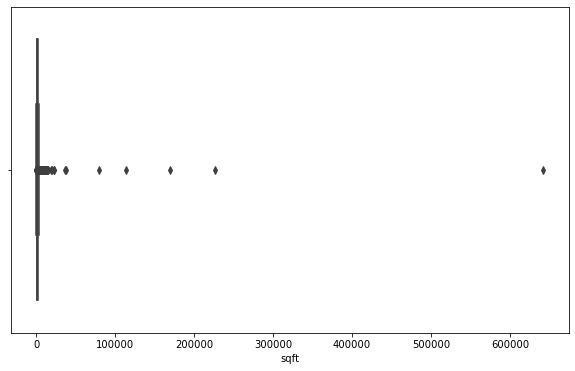

In [311]:
sns.boxplot(df_clean.sqft)

In [354]:
Q1 = np.nanpercentile(df['sqft'],25)
Q3 = np.nanpercentile(df['sqft'],75)
IQR = Q3 - Q1

sqft_outlier_rows = df_clean[(df_clean['sqft'] < Q1 - 1.5*IQR) | (df_clean['sqft'] > Q3 + 1.5*IQR)].index
len(sqft_outlier_rows)

342

### 5.1 Handling sqft outliers :

In [356]:

df_clean

,price,beds,baths,garage,stories,house_type,lot_sqft,sqft,year_built,address,state,city,county
0,139900.0,3.0,2.0,2,2,single_family,12632,1190,1920,154 Maple Ave,NY,Delanson,Schenectady
1,395000.0,4.0,3.0,2,2,single_family,30056,2987,1982,1169 Hidden Valley Trl,NY,Webster,Monroe
2,185000.0,4.0,2.0,1,1,single_family,7501,1863,1965,7869 Oneida Trl,NY,Bridgeport,Onondaga
3,440000.0,4.0,3.0,2,2,single_family,17860,1940,1965,16 Brookland Farms Rd,NY,Poughkeepsie,Dutchess
4,975700.0,5.0,6.0,3,2,single_family,25544,5660,1999,7534 Plum Hollow Cir,NY,Liverpool,Onondaga
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,1049000.0,6.0,2.0,1,2,multi_family,2896,1725,1920,74-15 88th Ave,NY,Woodhaven,Queens
8623,1495000.0,1.0,1.0,2,16,coop,10454,1725,1925,45 5th Ave Apt 17C,NY,New York City,New York
8624,1395000.0,3.0,1.0,2,5,condos,10454,1725,1890,705 Carroll St Apt 4R,NY,New York City,Kings
8625,4500000.0,6.0,4.0,2,4,townhomes,10454,1725,1958,608 3rd St,NY,New York City,Kings


## Fixing categorical features

In [357]:
df_clean['house_type'].value_counts()

single_family                  5350
coop                            954
multi_family                    894
condos                          864
townhomes                       303
land                            112
mobile                          110
condo_townhome_rowhome_coop      25
condop                            7
apartment                         6
farm                              2
Name: house_type, dtype: int64

## Cleaning less common cities (less than 20)

In [362]:
temp=df_clean['city'].value_counts()
val_to_keep=temp.loc[temp>=20]
df_clean= df_clean[df_clean['city'].isin(val_to_keep.index.tolist())]

In [363]:
df_clean['city'].value_counts()

New York City       609
Brooklyn            353
New York            318
Staten Island       238
Bronx               198
                   ... 
Kingston             20
Southampton          20
Wappingers Falls     20
Endicott             20
Northport            20
Name: city, Length: 66, dtype: int64

In [364]:
df_clean.shape

(4032, 13)

In [109]:
#df_cln_sale.to_csv('ForSale_Clean.csv')